# Week 5 handin

## Assignment

### Ex1 Use data from Danmarks Statistik - Databanken
1. Go to https://www.dst.dk/da/Statistik/brug-statistikken/muligheder-i-statistikbanken/api#testkonsol
2. Open 'Konsol' and click 'Start Konsol'
3. In the console at pt 1: choose 'Retrieve tables', pt 2: choose get request and json format and pt 3: execute:
  1. check the result
  2. in the code below this same get request is used to get information about all available data tables in 'databanken'. 
4. Change pt. 1 in the console to 'Retrieve data', pt 2: 'get request' and Table id: 'FOLK1A', format: csv, delimiter: semicolon and click: 'Variable and value codes' and choose some sub categories (Hint: hover over the codes to see their meaning). Finally execute and see what data you get.
5. With data aggregation and data visualization answer the following questions:
  1. What is the change in pct of divorced danes from 2008 to 2020?
  2. Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?
  3. Show a bar chart of changes in marrital status in Copenhagen from 2008 till now
  4. Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020 (Hint: x axis is age from 0-125, y axis is how many people in the 2 categories). Add lengend to show names on graphs
  
### Ex2 Use another table (extra)
Choose any of the other tables in 'databanken' to find interesting data.
1. Collect the data
2. Pose 5 or more interesing questions to the data
3. Answer the questions by aggregating the data
4. Illustrate the answers with visual plots

## Status

Alle opgaver udover extra opgaverne er lavet.

# Exercise 1
### 1 - 4 done on website
### 5. A

In [1]:
import pandas as pd 

data = pd.read_csv("https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=000&Tid=2008K1%2C2020K1&CIVILSTAND=F%2CTOT", sep=";")
print(data)

pct_2008 = (data["INDHOLD"][0] / data["INDHOLD"][1]) * 100
pct_2020 = (data["INDHOLD"][2] / data["INDHOLD"][3]) * 100

print("\nDifference in percentage of divorced Danes from 2008 to 2020\n2008:", pct_2008, "%", "\n2020:", pct_2020, "%\n\nDifference:", pct_2020 - pct_2008, "%")

        OMRÅDE     TID CIVILSTAND  INDHOLD
0  Hele landet  2008K1   Fraskilt   428864
1  Hele landet  2008K1      I alt  5475791
2  Hele landet  2020K1   Fraskilt   544588
3  Hele landet  2020K1      I alt  5822763

Difference in percentage of divorced Danes from 2008 to 2020
2008: 7.832000892656421 % 
2020: 9.352741988640101 %

Difference: 1.5207410959836807 %


### 5. B

In [2]:
data = pd.read_csv("https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=U%2CTOT&OMR%C3%85DE=*&Tid=2020K4", sep=";")
data = data.sort_values(by=["INDHOLD"], ascending=False)

# ~ is an inversion operator (turning True to False), so this means false (or does NOT contain)
data_no_regions = data[(data["OMRÅDE"] != "Hele landet") & (~data["OMRÅDE"].str.contains("Region"))] 
totals = data_no_regions[data["CIVILSTAND"] == "I alt"]
biggest_cities = []

for city in totals["OMRÅDE"]:
    if (city not in biggest_cities) & (len(biggest_cities) < 5):
        biggest_cities.append(city)

print(biggest_cities, "\n")
current = {"pct": 0, "city": ""}

for city in biggest_cities:
    pop = data_no_regions[data_no_regions["OMRÅDE"] == city]
    print(pop, "\n")
    unmarried = pop.index[1]
    total = pop.index[0]
    pct_unmarried = (pop["INDHOLD"][unmarried] / pop["INDHOLD"][total]) * 100

    if (current["pct"] < pct_unmarried):
        current["city"] = city
        current["pct"] = pct_unmarried
    else:
        continue

print("\n", "Of the 5 biggest cities,", current["city"], "has the highest percentage of never married people. \nPercentage:", current["pct"], "%")
    

['København', 'Aarhus', 'Aalborg', 'Odense', 'Vejle'] 

    CIVILSTAND     OMRÅDE     TID  INDHOLD
107      I alt  København  2020K4   637936
2        Ugift  København  2020K4   417782 

    CIVILSTAND  OMRÅDE     TID  INDHOLD
189      I alt  Aarhus  2020K4   353445
84       Ugift  Aarhus  2020K4   211863 

    CIVILSTAND   OMRÅDE     TID  INDHOLD
209      I alt  Aalborg  2020K4   219310
104      Ugift  Aalborg  2020K4   120226 

    CIVILSTAND  OMRÅDE     TID  INDHOLD
163      I alt  Odense  2020K4   205881
58       Ugift  Odense  2020K4   113639 

    CIVILSTAND OMRÅDE     TID  INDHOLD
176      I alt  Vejle  2020K4   116665
71       Ugift  Vejle  2020K4    55116 


 Of the 5 biggest cities, København has the highest percentage of never married people. 
Percentage: 65.4896415941411 %


<ipython-input-2-b121357dd8e4>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  totals = data_no_regions[data["CIVILSTAND"] == "I alt"]


### 5. C - D

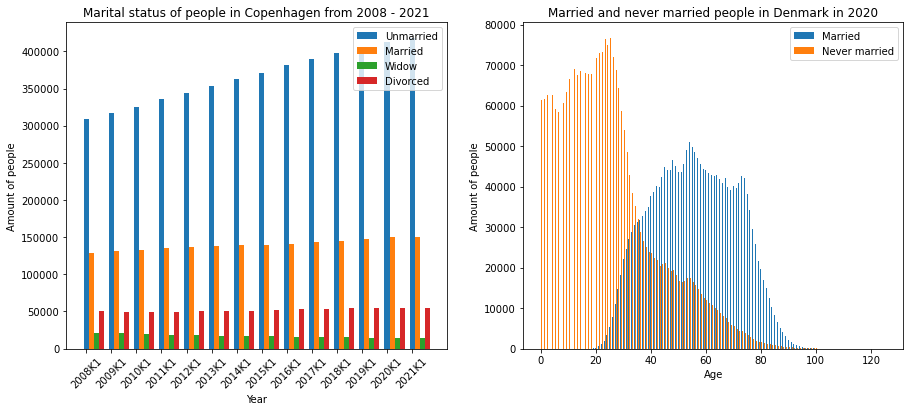

In [3]:
import numpy as np
import matplotlib.pyplot as plt 

# 5. C
data = pd.read_csv("https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&Tid=2008K1%2C2009K1%2C2010K1%2C2011K1%2C2012K1%2C2013K1%2C2014K1%2C2015K1%2C2016K1%2C2017K1%2C2018K1%2C2019K1%2C2020K1%2C2021K1&CIVILSTAND=U%2CG%2CE%2CF&OMR%C3%85DE=101", sep=";")

unmarried_dict = {}
married_dict = {}
widow_dict = {}
divorced_dict = {}

statuses = np.unique(data["CIVILSTAND"])

def fill_dict(dict, dict_data, index):
    dict[dict_data["TID"][index]] = dict_data["INDHOLD"][index]

for status in statuses:
    pop = data[data["CIVILSTAND"] == status]
    indices = list(pop.index)
    for index in indices:
        if status == "Ugift":
            fill_dict(unmarried_dict, pop, index)
        elif status == "Gift/separeret":
            fill_dict(married_dict, pop, index)
        elif status == "Enke/enkemand":
            fill_dict(widow_dict, pop, index)
        elif status == "Fraskilt":
            fill_dict(divorced_dict, pop, index)
        else:
            continue


# 5. D
data_2 = pd.read_csv("https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=U%2CG&ALDER=*&OMR%C3%85DE=000&Tid=2020K4", sep=";")
married_2020 = {}
unmarried_2020 = {}

ages = []
for age in data_2["ALDER"]:
    if age not in ages:
        ages.append(age)

for age in ages:
    pop_married = data_2[(data_2["ALDER"] == age) & (data_2["CIVILSTAND"] == "Gift/separeret")]
    pop_unmarried = data_2[(data_2["ALDER"] == age) & (data_2["CIVILSTAND"] == "Ugift")]
    married_indices = list(pop_married.index)
    unmarried_indices = list(pop_unmarried.index)

    for index in married_indices:
        if pop_married["ALDER"][index] != "I alt":
            married_2020[pop_married["ALDER"][index]] = pop_married["INDHOLD"][index]
    for index in unmarried_indices:
        if pop_unmarried["ALDER"][index] != "I alt":
            unmarried_2020[pop_unmarried["ALDER"][index]] = pop_unmarried["INDHOLD"][index]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 5. C plot
width = 0.2
x_range = list(range(0, len(unmarried_dict)))
married_x_vals = [x+width for x in x_range]
widow_x_vals = [x+(width*2) for x in x_range]
divorced_x_vals = [x+(width*3) for x in x_range]

unmarried = ax1.bar(unmarried_dict.keys(), unmarried_dict.values(), width=width)
married = ax1.bar(married_x_vals, married_dict.values(), width=width)
widow = ax1.bar(widow_x_vals, widow_dict.values(), width=width)
divorced = ax1.bar(divorced_x_vals, divorced_dict.values(), width=width)

ax1.set_title("Marital status of people in Copenhagen from 2008 - 2021")
ax1.set_xlabel("Year")
ax1.set_ylabel("Amount of people")
ax1.legend((unmarried[0], married[0], widow[0], divorced[0]), ("Unmarried", "Married", "Widow", "Divorced"), loc="upper right")
plt.setp(ax1.get_xticklabels(), rotation=45)

# 5. D plot
plt_2_width = 0.35
m_ages = list(range(126))
um_ages = [x+plt_2_width for x in m_ages]
all_ages_married_dk = ax2.bar(m_ages, married_2020.values(), width=plt_2_width)
all_ages_unmarried_dk = ax2.bar(um_ages, unmarried_2020.values(), width=plt_2_width)

ax2.set_title("Married and never married people in Denmark in 2020")
ax2.set_xlabel("Age")
ax2.set_ylabel("Amount of people")
ax2.legend((all_ages_married_dk[0], all_ages_unmarried_dk[0]), ("Married", "Never married"), loc="upper right")

plt.show()



### 5. D by itself (explanation below)

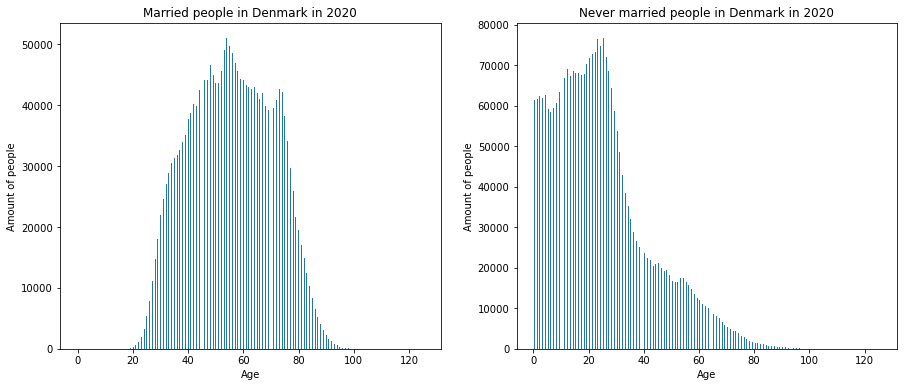

In [5]:
# I initially completed this exercise as seen in the previous cell, but later became uncertain about
# whether that was the right way to do it after rereading the exercise. Therefore, I redid it here
# with two separate plots for married and never married people, instead of having the two combined
# in one plot next to the plot from exercise 5. C.

data_2 = pd.read_csv("https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=U%2CG&ALDER=*&OMR%C3%85DE=000&Tid=2020K4", sep=";")
married_2020 = {}
unmarried_2020 = {}

ages = []
for age in data_2["ALDER"]:
    if age not in ages:
        ages.append(age)

for age in ages:
    pop_married = data_2[(data_2["ALDER"] == age) & (data_2["CIVILSTAND"] == "Gift/separeret")]
    pop_unmarried = data_2[(data_2["ALDER"] == age) & (data_2["CIVILSTAND"] == "Ugift")]
    married_indices = list(pop_married.index)
    unmarried_indices = list(pop_unmarried.index)

    for index in married_indices:
        if pop_married["ALDER"][index] != "I alt":
            married_2020[pop_married["ALDER"][index]] = pop_married["INDHOLD"][index]
    for index in unmarried_indices:
        if pop_unmarried["ALDER"][index] != "I alt":
            unmarried_2020[pop_unmarried["ALDER"][index]] = pop_unmarried["INDHOLD"][index]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
plt_2_width = 0.35
m_ages = list(range(126))
um_ages = [x+plt_2_width for x in m_ages]
all_ages_married_dk = ax1.bar(m_ages, married_2020.values(), width=plt_2_width)
all_ages_unmarried_dk = ax2.bar(um_ages, unmarried_2020.values(), width=plt_2_width)

ax1.set_title("Married people in Denmark in 2020")
ax1.set_xlabel("Age")
ax1.set_ylabel("Amount of people")

ax2.set_title("Never married people in Denmark in 2020")
ax2.set_xlabel("Age")
ax2.set_ylabel("Amount of people")

plt.show()